<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/2019_tf/autoencoders_tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders on Tabular Data

* Normalizaing data: https://www.tensorflow.org/api_docs/python/tf/keras/utils/normalize   

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.12.0


# Loading and exploring our data set

This is a database of customers of an insurance company. Each data point is one customer. The group represents the number of accidents the customer has been involved with in the past

* 0 - red: many accidents
* 1 - green: few or no accidents
* 2 - yellow: in the middle        

In [2]:
!curl -O https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26783  100 26783    0     0  39271      0 --:--:-- --:--:-- --:--:-- 39328


In [0]:
import pandas as pd

df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [4]:
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


In [5]:
df.head()

,speed,age,miles,group
0,98.0,44.0,25.0,1
1,118.0,54.0,24.0,1
2,111.0,26.0,34.0,0
3,97.0,25.0,10.0,2
4,114.0,38.0,22.0,1


In [6]:
sns.pairplot?

Object `sns.pairplot` not found.


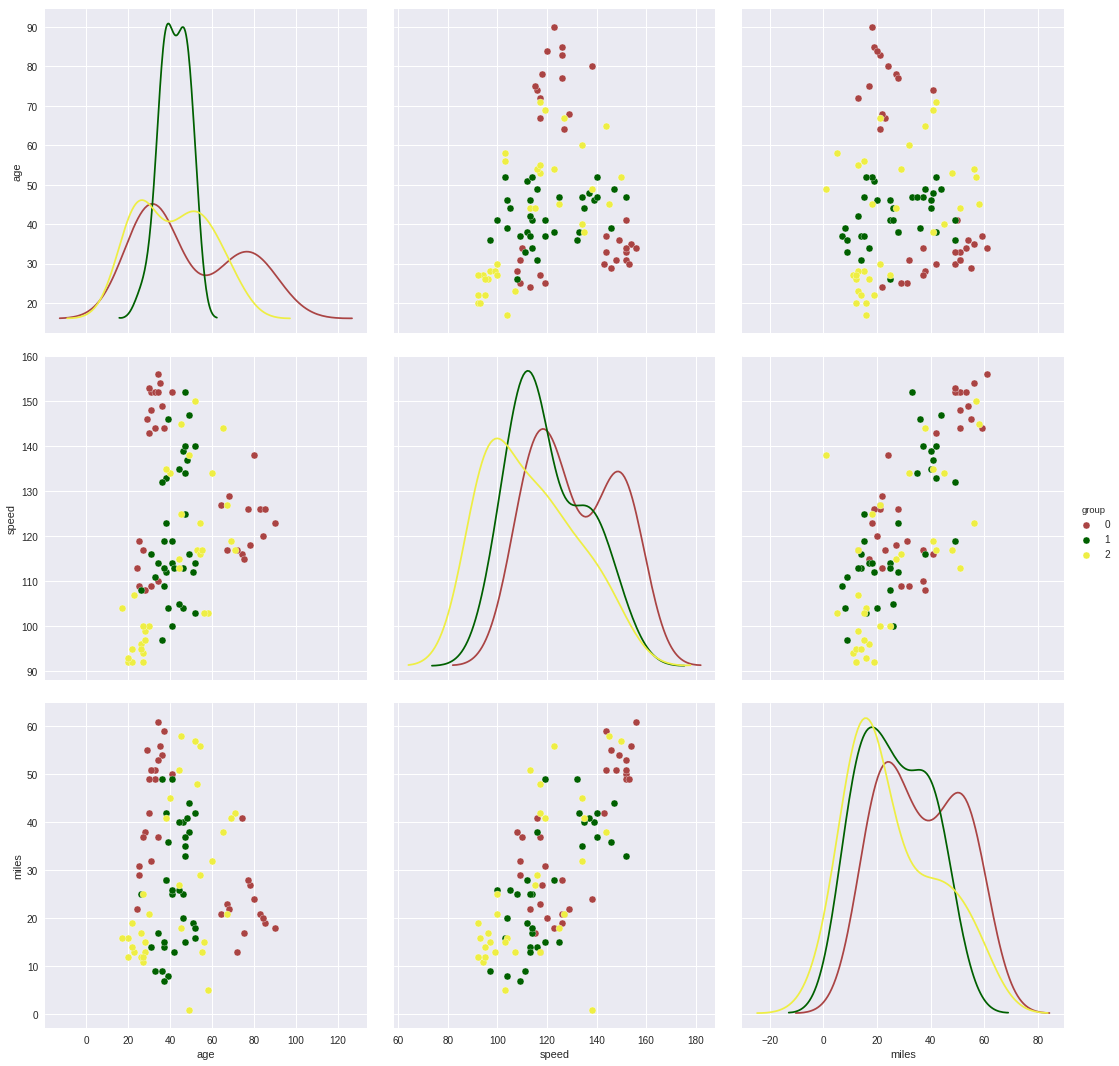

In [7]:
import seaborn as sns

sample_df = df.sample(n=100, random_state=42)
sns.pairplot(sample_df, 
             hue="group", palette={0: '#AA4444', 1: '#006000', 2: '#EEEE44'},
#              kind='reg',
             size=5,
             diag_kind='kde',
             vars=['age', 'speed', 'miles'])

In [8]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential, Model

encoding_dim = 32

input_data = Input(shape=(4,))
encoded = Dense(units=encoding_dim, activation='relu', name="encoder")(input_data)
decoded = Dense(units=4, activation='linear', name="decoder")(encoded)

autoencoder = Model(inputs=input_data, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary();

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
encoder (Dense)              (None, 32)                160       
_________________________________________________________________
decoder (Dense)              (None, 4)                 132       
Total params: 292
Trainable params: 292
Non-trainable params: 0
_________________________________________________________________


In [9]:
X = df
BATCH_SIZE = 2
%time history = autoencoder.fit(X, X, epochs=10, batch_size=BATCH_SIZE, shuffle=True, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 794.3408
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 26.6884
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 3.4848
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5778
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3111
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1874
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1035
Epoch 8/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0522
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0263
Epoch 10/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0158
CPU times: user 31.3 s, sys: 4.85 s, total: 36.1 s
Wall time: 27 s


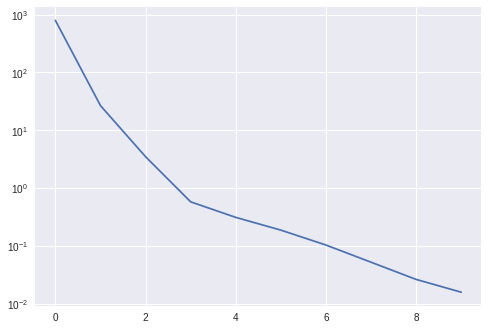

In [10]:
import matplotlib.pyplot as plt

plt.yscale('log')
plt.plot(history.history['loss'])

In [11]:
autoencoder.evaluate(X, X, batch_size=BATCH_SIZE)

1500/1500 [==============================] - 1s 756us/step


0.006468222198852648

In [12]:
samples = df.sample(10).reset_index(drop=True)
samples

,speed,age,miles,group
0,129.0,86.0,19.0,0
1,90.0,45.0,16.0,1
2,149.0,49.0,42.0,1
3,133.0,25.0,13.0,0
4,112.0,90.0,30.0,0
5,106.0,63.0,18.0,2
6,113.0,18.0,33.0,0
7,149.0,64.0,43.0,2
8,163.0,54.0,34.0,2
9,116.0,32.0,26.0,0


In [13]:
predictions = pd.DataFrame(autoencoder.predict(samples), columns=["speed",	"age",	"miles",	"group"])
predictions

,speed,age,miles,group
0,128.961258,85.923576,18.900248,-0.006706
1,90.151421,45.061462,16.059481,0.949445
2,148.886597,48.882580,42.045868,0.945923
3,132.866119,24.942982,13.047067,0.081237
4,112.042259,90.348137,29.915968,0.101176
5,106.085358,62.973957,18.047056,1.878531
6,113.032661,18.036285,33.063389,0.029089
7,148.907516,63.850685,43.039570,1.865696
8,162.786240,53.795361,34.029854,1.910720
9,116.012772,32.013981,26.059599,0.028782


In [14]:
samples.subtract(predictions)

,speed,age,miles,group
0,0.038742,0.076424,0.099752,0.006706
1,-0.151421,-0.061462,-0.059481,0.050555
2,0.113403,0.117420,-0.045868,0.054077
3,0.133881,0.057018,-0.047067,-0.081237
4,-0.042259,-0.348137,0.084032,-0.101176
5,-0.085358,0.026043,-0.047056,0.121469
6,-0.032661,-0.036285,-0.063389,-0.029089
7,0.092484,0.149315,-0.039570,0.134304
8,0.213760,0.204639,-0.029854,0.089280
9,-0.012772,-0.013981,-0.059599,-0.028782


## Looks quite nice, but how impressed are you by abstracting 4 variables into 32?

Let us try dimension of 2

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 3807.0403
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2421.8394
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1552.2815
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 982.8292
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 612.8808
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 391.1961
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 275.2887
Epoch 8/10
1500/1500 [==============================] - 2s 2ms/step - loss: 226.8419
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 212.5567
Epoch 10/10
1500/1500 [==============================] - 2s 2ms/step - loss: 209.5767
CPU times: user 31.3 s, sys: 4.57 s, total: 35.8 s
Wall time: 25.5 s


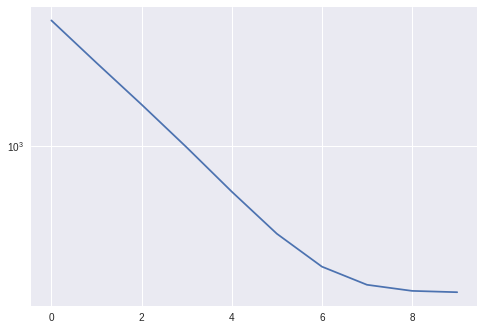

In [15]:
encoding_dim = 2

input_data = Input(shape=(4,))
# notice tanh
encoded = Dense(units=encoding_dim, activation='tanh', name="encoder")(input_data)
decoded = Dense(units=4, activation='linear', name="decoder")(encoded)

autoencoder = Model(inputs=input_data, outputs=decoded)
# this does not get much better than 210 as a loss (bad), so we can just as well get there a bit faster (10 instead of 50 epochs with standard lr)
adam = keras.optimizers.Adam(lr=0.01)
# adam = keras.optimizers.Adam()
autoencoder.compile(optimizer=adam, loss='mse')
BATCH_SIZE = 2
%time history = autoencoder.fit(X, X, epochs=10, batch_size=BATCH_SIZE, shuffle=True, verbose=1)
plt.yscale('log')
plt.plot(history.history['loss'])

In [16]:
autoencoder.evaluate(X, X, batch_size=BATCH_SIZE)

1500/1500 [==============================] - 1s 789us/step


209.12026048787436

In [17]:
# just average over all of them :D
predictions = pd.DataFrame(autoencoder.predict(samples), columns=["speed",	"age",	"miles",	"group"])
predictions

,speed,age,miles,group
0,122.033234,45.417992,30.331961,0.90692
1,122.033234,45.417992,30.331961,0.90692
2,122.033234,45.417992,30.331961,0.90692
3,122.033234,45.417992,30.331961,0.90692
4,122.033234,45.417992,30.331961,0.90692
5,122.033234,45.417992,30.331961,0.90692
6,122.033234,45.417992,30.331961,0.90692
7,122.033234,45.417992,30.331961,0.90692
8,122.033234,45.417992,30.331961,0.90692
9,122.033234,45.417992,30.331961,0.90692


In [18]:
samples.describe()

,speed,age,miles,group
count,10.000000,10.000000,10.000000,10.000000
mean,126.000000,52.600000,27.400000,0.800000
std,22.720524,24.056415,10.731056,0.918937
min,90.000000,18.000000,13.000000,0.000000
25%,112.250000,35.250000,18.250000,0.000000
50%,122.500000,51.500000,28.000000,0.500000
75%,145.000000,63.750000,33.750000,1.750000
max,163.000000,90.000000,43.000000,2.000000


### relu makes it train

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 4201.1962
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 238.5806
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 130.4345
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 118.9675
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 114.3226
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 113.6420
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 113.6160
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 113.3991
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 113.6266
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 113.2347
CPU times: user 1min, sys: 8.7 s, total: 1min 9s
Wall time: 49 s


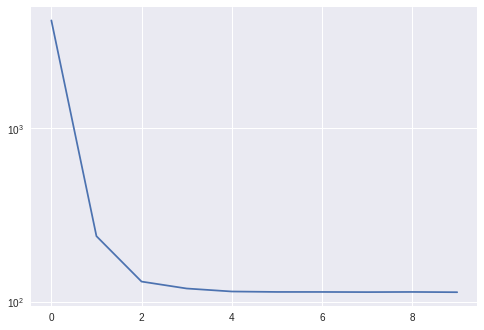

In [19]:
encoding_dim = 2

input_data = Input(shape=(4,))
# notice relu
encoded = Dense(units=encoding_dim, activation='relu', name="encoder")(input_data)
decoded = Dense(units=4, activation='linear', name="decoder")(encoded)

autoencoder = Model(inputs=input_data, outputs=decoded)
# adam = keras.optimizers.Adam(lr=0.01)
adam = keras.optimizers.Adam()
autoencoder.compile(optimizer=adam, loss='mse')
BATCH_SIZE = 1
%time history = autoencoder.fit(X, X, epochs=10, batch_size=BATCH_SIZE, shuffle=True, verbose=1)
plt.yscale('log')
plt.plot(history.history['loss'])

In [20]:
samples

,speed,age,miles,group
0,129.0,86.0,19.0,0
1,90.0,45.0,16.0,1
2,149.0,49.0,42.0,1
3,133.0,25.0,13.0,0
4,112.0,90.0,30.0,0
5,106.0,63.0,18.0,2
6,113.0,18.0,33.0,0
7,149.0,64.0,43.0,2
8,163.0,54.0,34.0,2
9,116.0,32.0,26.0,0


In [21]:
# all groups close to 1, all off as they might not add to a big error
predictions = pd.DataFrame(autoencoder.predict(samples), columns=["speed",	"age",	"miles",	"group"])
predictions

,speed,age,miles,group
0,137.571930,50.578327,35.464401,0.954679
1,92.477554,34.019840,23.293760,1.076675
2,147.884766,54.365166,38.247761,0.926779
3,120.902443,44.457355,30.965427,0.999776
4,127.444267,46.859489,32.731018,0.982078
5,111.400162,40.968151,28.400833,1.025483
6,107.057762,39.373638,27.228851,1.037231
7,152.596542,56.095314,39.519436,0.914032
8,158.911209,58.414032,41.223713,0.896948
9,112.148987,41.243118,28.602936,1.023457


### Let's try normalizing the data first (caution: losses do not compare any more)

In [22]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')
normalized_df = (df - df.mean()) / df.std()
normalized_df.head()

,speed,age,miles,group
0,-1.391286,-0.057247,-0.356309,0.001632
1,-0.255202,0.526510,-0.421879,0.001632
2,-0.652832,-1.108011,0.233824,-1.222706
3,-1.448090,-1.166386,-1.339863,1.225971
4,-0.482419,-0.407502,-0.553020,0.001632


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8163
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6173
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5150
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4154
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3622
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3378
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3271
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3212
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3186
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3166
CPU times: user 1min 1s, sys: 8.68 s, total: 1min 9s
Wall time: 49.6 s


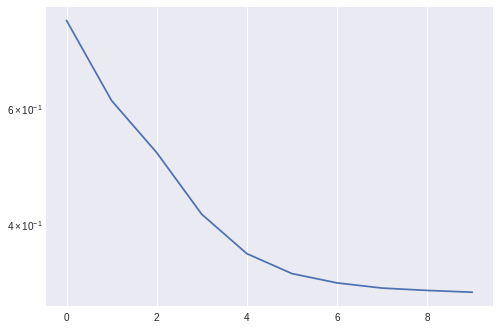

In [23]:
X = normalized_df
encoding_dim = 2

input_data = Input(shape=(4,))
# notice relu
encoded = Dense(units=encoding_dim, activation='relu', name="encoder")(input_data)
decoded = Dense(units=4, activation='linear', name="decoder")(encoded)

autoencoder = Model(inputs=input_data, outputs=decoded)
# adam = keras.optimizers.Adam(lr=0.01)
adam = keras.optimizers.Adam()
autoencoder.compile(optimizer=adam, loss='mse')
BATCH_SIZE = 1
%time history = autoencoder.fit(X, X, epochs=10, batch_size=BATCH_SIZE, shuffle=True, verbose=1)
plt.yscale('log')
plt.plot(history.history['loss'])

## This makes it very hard to estimate how well we did our job, but we can still plot the embedding

Could be interpreted as a fancy version of dimensionality reduction


In [0]:
encoder = Model(inputs=input_data, outputs=encoded)
latent_representation = encoder.predict(X)

In [25]:
latent_representation.shape

(1500, 2)

### Look, ma, clusters

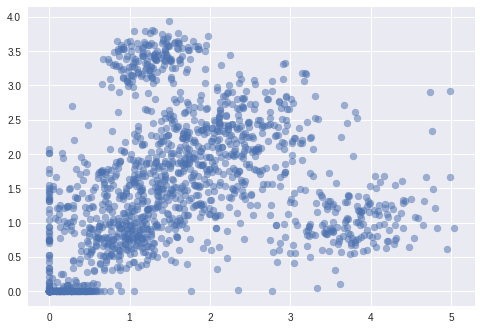

In [26]:
latent_x = latent_representation[:, 0]
latent_y = latent_representation[:, 1]
plt.scatter(latent_x, latent_y, alpha=0.5)

### Clusters have actual meaning

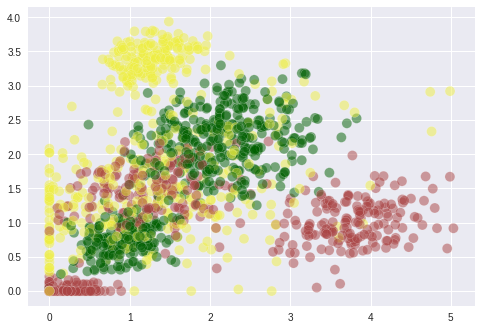

In [27]:
from matplotlib.colors import ListedColormap

# * 0 - red: many accidents
# * 1 - green: few or no accidents
# * 2 - yellow: in the middle
colors = X['group']
color_map = ListedColormap(['#AA4444', '#006000', '#EEEE44'])

plt.scatter(latent_x, latent_y, alpha=0.5, s=100, marker='o', edgecolors='w', cmap=color_map, c=colors)